In [106]:
#Import librarys
import pandas as pd
import seaborn as srn
import statistics as sts

In [107]:
data = pd.read_csv("tempo.csv", sep=";")
data

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [108]:
agrupado = data.groupby(["Aparencia"]).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

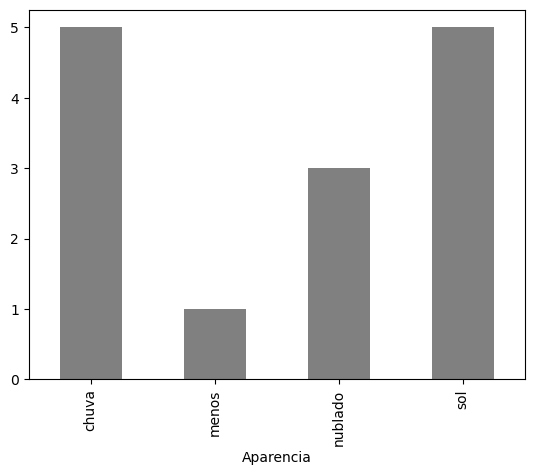

In [109]:
agrupado.plot.bar(color = "gray")

<AxesSubplot:xlabel='Vento'>

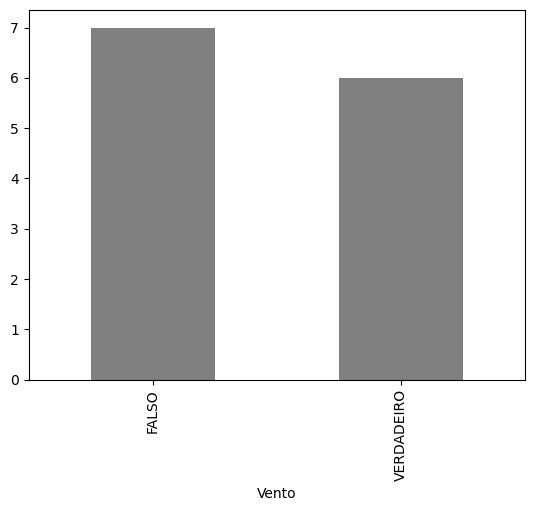

In [110]:
agrupado = data.groupby(["Vento"]).size()
agrupado
agrupado.plot.bar(color="grey")

<AxesSubplot:xlabel='Jogar'>

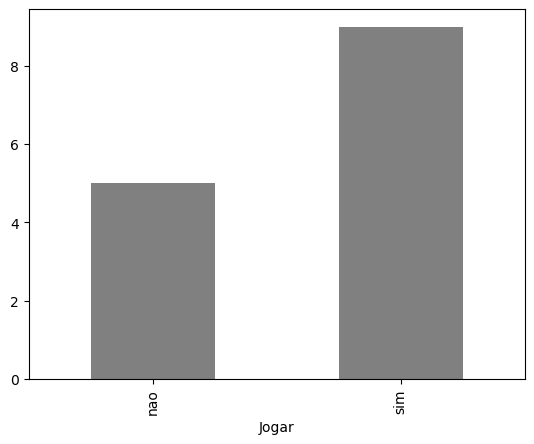

In [111]:
agrupado = data.groupby(["Jogar"]).size()
agrupado.plot.bar(color="gray")

In [112]:
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [113]:
data.loc[data["Aparencia"] == "menos", "Aparencia"] = "Sol"
agrupado = data.groupby(["Aparencia"]).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [114]:
data.loc[(data["Temperatura"] < -130) | (data["Temperatura"] > 130)]
median = sts.median(data["Temperatura"])
data.loc[(data["Temperatura"] < -130) | (data["Temperatura"] > 130), "Temperatura"] = median

data["Temperatura"]

0     85.0
1     80.0
2     83.0
3     70.0
4     68.0
5     65.0
6     64.0
7     73.5
8     69.0
9     75.0
10    75.0
11    72.0
12    81.0
13    71.0
Name: Temperatura, dtype: float64

In [115]:
data["Umidade"].isnull()
median = sts.median(data["Umidade"])
median
data["Umidade"].fillna(median, inplace=True)

data.loc[(data["Umidade"]< 0) | (data["Umidade"]> 100), "Umidade"] = median
data["Umidade"].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [117]:
data["Vento"].isnull().sum()

agrupamento = data.groupby(["Vento"]).size()
agrupamento



Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [118]:
data["Vento"].fillna("FALSO", inplace=True)
data["Vento"].isnull().sum()

0